<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday24052022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install country_list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from country_list import countries_for_language
countries_dict = dict(countries_for_language('en'))  # Get a list of country names
countries = list(countries_dict.values())

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm
#from mpl_toolkits.basemap import Basemap
#from geopy.geocoders import Nominatim
#from matplotlib.lines import Line2D

In [4]:
# Font control
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

--2022-05-27 05:37:11--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-05-27 05:37:12--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc.1’

Avenir.ttc.1        100%[===================>]   1.56M  --.-KB/s    in 0.03s   

2022-05-27 05:37:12 (56.6 MB/s) - ‘Avenir.ttc.1’ saved [1639536/1639536]

/content/Avenir.ttc


In [52]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-24/sevens.csv')

# Filter
df = df[(df.stage == 'Final') & 
        (df.team_1.isin(countries)) & (df.team_2.isin(countries))]

# Group data
df_mgn = df.groupby('winner').mean()[['margin']]
df_ct = df.groupby('winner').count()[['row_id']]

df = pd.DataFrame()  # Init new df
df['Average Winning Margin'] = df_mgn['margin']
df['Winning Times Count'] = df_ct['row_id']
df = df.reset_index()
df = df.rename(str.title, axis='columns')
df= df.sort_values('Winning Times Count', ascending=False)

In [53]:
# Viewer
df

,Winner,Average Winning Margin,Winning Times Count
30,New Zealand,17.540541,37
1,Australia,13.523810,21
22,Japan,9.285714,21
3,Brazil,22.200000,20
4,Canada,19.000000,13
39,South Africa,17.400000,10
5,China,12.600000,10
37,Russia,16.000000,9
44,Thailand,23.125000,8
13,France,9.875000,8


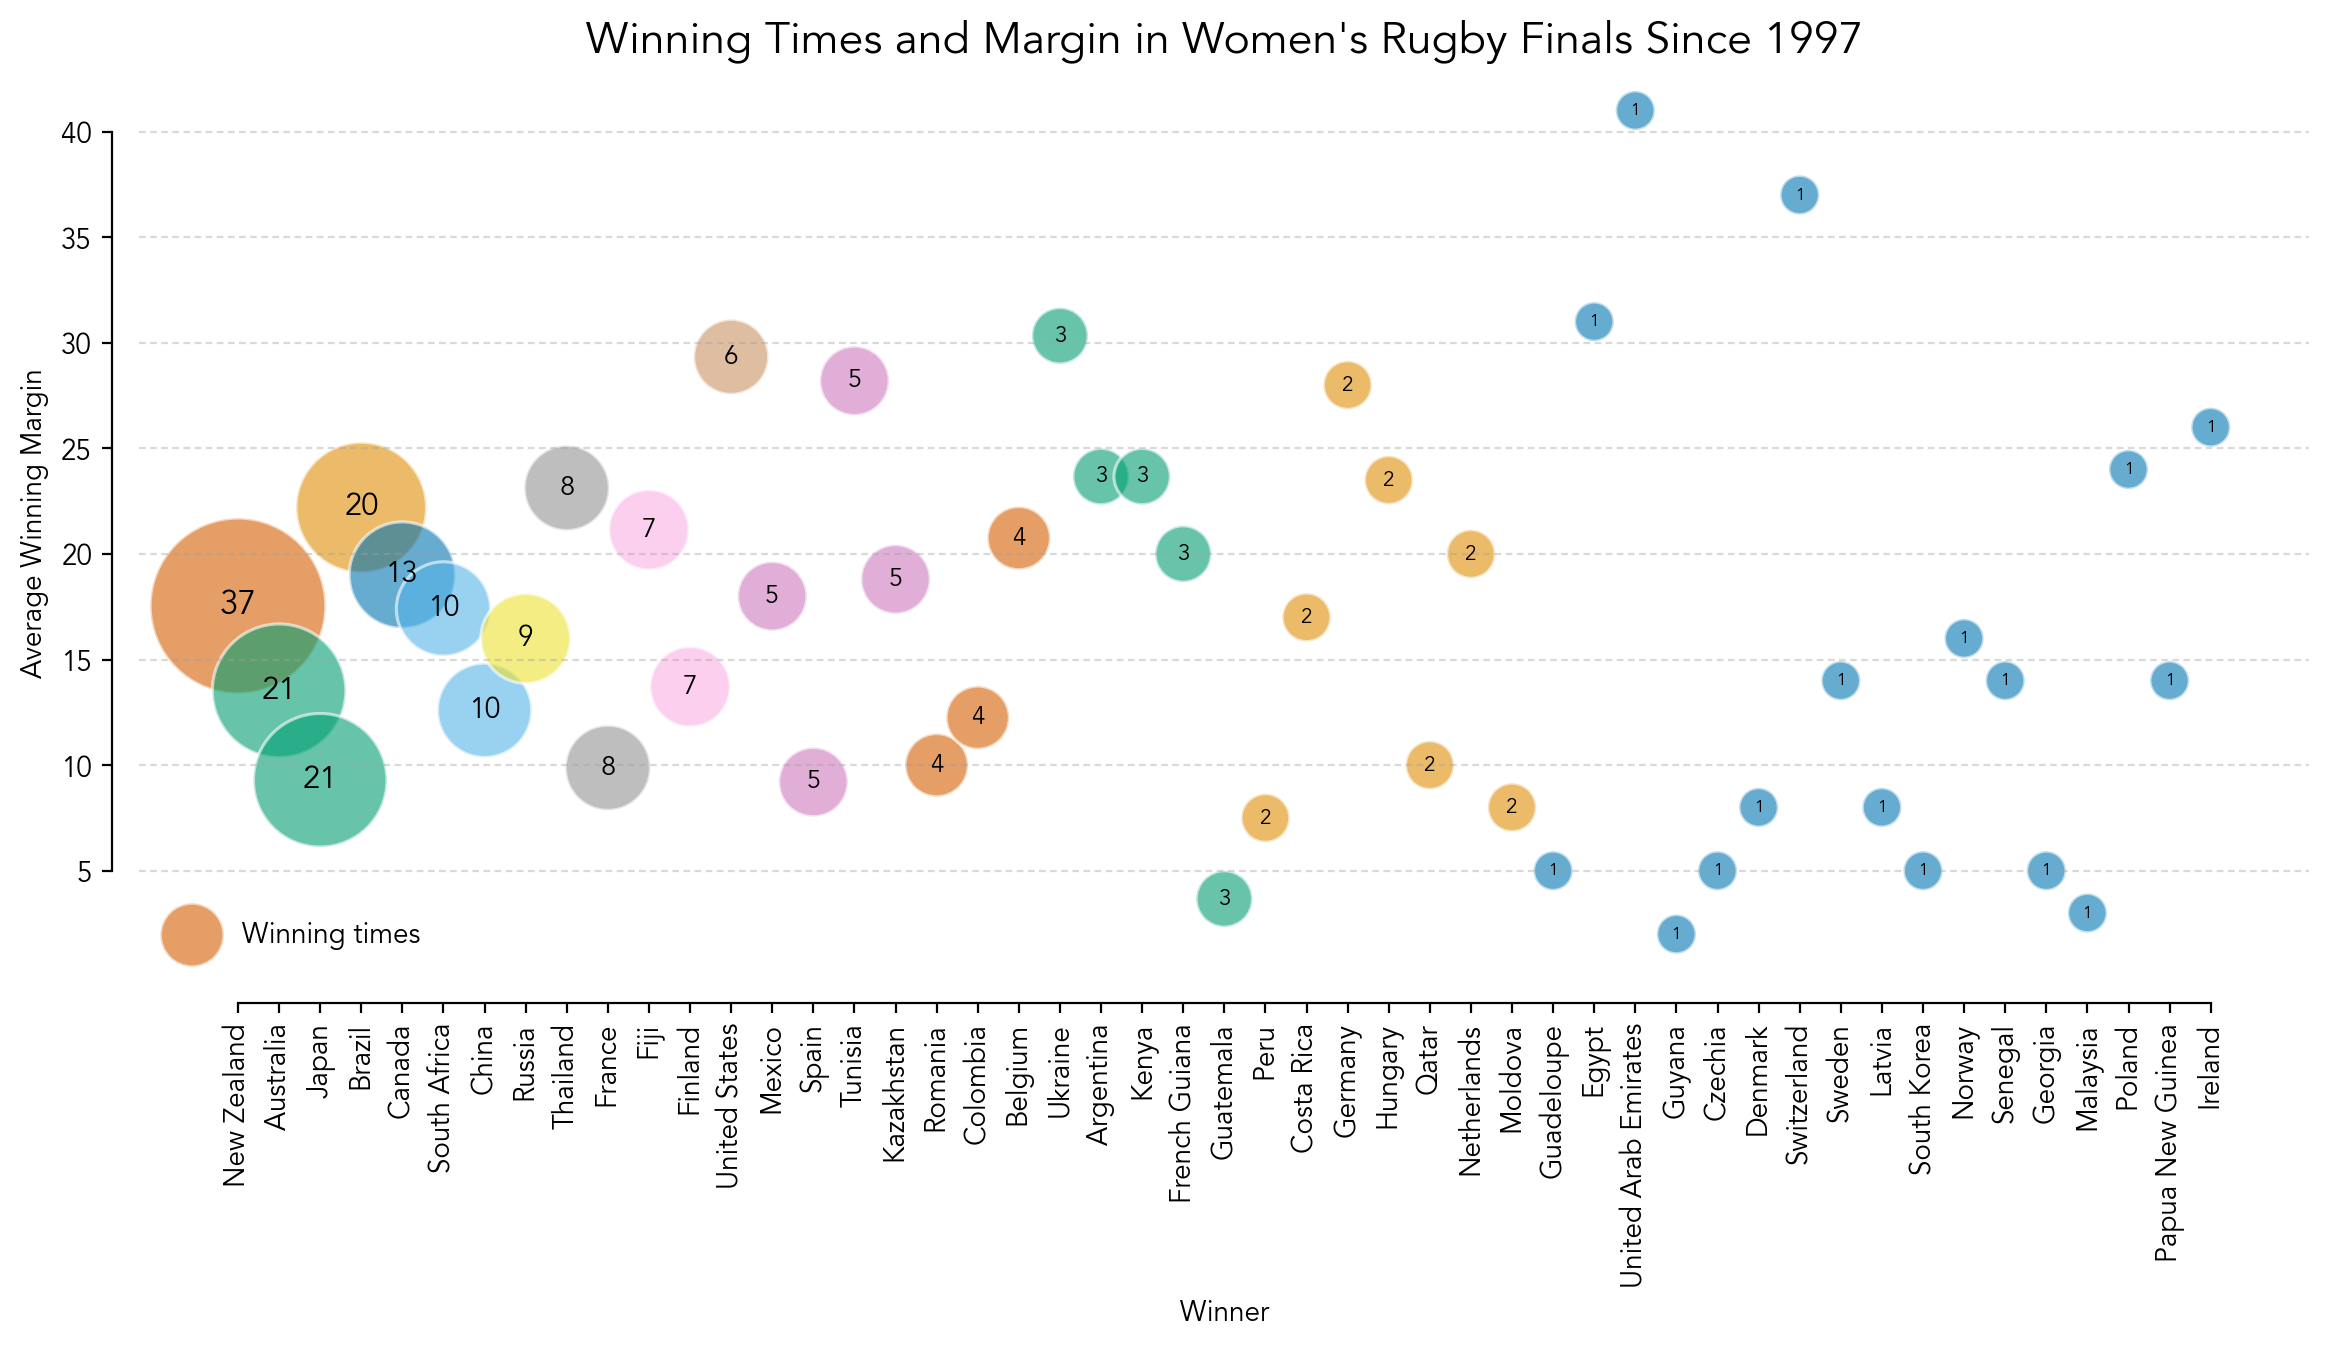

In [98]:
# Plotting

plt.figure(figsize=(14,6), 
           dpi=200, 
           facecolor='w',
           #frameon=False
           )

plt.grid(axis='y',
         color='#a0a0a0',
         alpha=.4,
         dashes=[3,2])

sns.scatterplot(data=df, 
                x="Winner", 
                y="Average Winning Margin", 
                size="Winning Times Count", 
                hue='Winning Times Count',
                legend=False, 
                palette='colorblind',
                alpha=.6,
                sizes=(200, 4000))

for i, row in df.iterrows():
  x, y = row['Winner'], row['Average Winning Margin']
  plt.text(x, y, 
           "{:.0f}".format(row['Winning Times Count']), 
           fontdict={'size':10 * \
                     (np.log10(row["Winning Times Count"] + 1) ** 0.4),
                     'color':'k'},
           horizontalalignment='center',
           verticalalignment='center'
           )


plt.title('Winning Times and Margin in Women\'s\
 Rugby Finals Since 1997',
          fontdict={'size': 16})

sns.despine(offset=10, trim=True)
plt.legend(markerscale=.5, labels=['Winning times'],
           frameon=False,
           loc='lower left')

plt.xticks(rotation=90)
plt.show()